### Информация
- *Автор*: Зитцер Данил
- *Дата*: четверг, 7 октября 2021 г., 14:46:00
- *Описание*: Краткое введение в OpenCV

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (18, 9)
plt.rcParams['font.size'] = 20

![](./../images/01-opencv.jpeg)

Изображение в градациях серого состоит только из одного канала, в котором хранится интенсивность белого цвета:

![](./../images/02-gray.png)

В цветном изображении три канала, каждый для своего цвета соответственно: красного, зелёного, синего

![](./../images/03-rgb.png)

### Создание изображений

In [2]:
black = np.zeros(shape=(150, 150, 3), dtype=np.uint8)

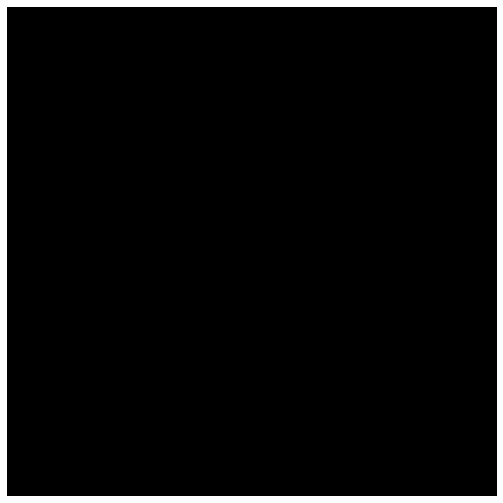

In [3]:
plt.imshow(black)
_ = plt.axis('off')

In [4]:
white = np.full(shape=(150, 150, 3), fill_value=255, dtype=np.uint8)

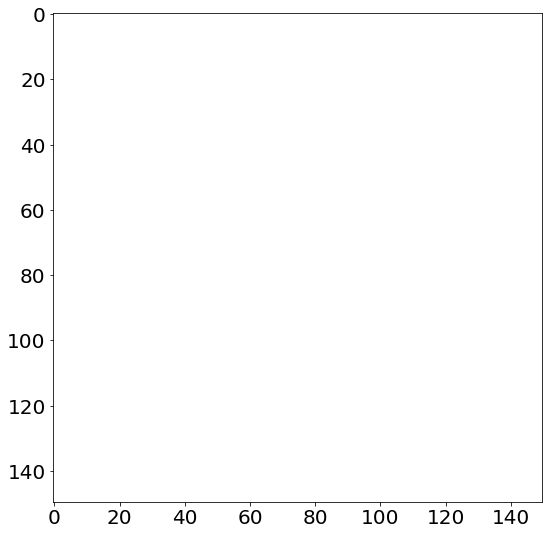

In [5]:
plt.imshow(white)

In [6]:
green = np.zeros(shape=(150, 150, 3), dtype=np.uint8)
green.shape

(150, 150, 3)

In [7]:
green[:, :, 1] = 255

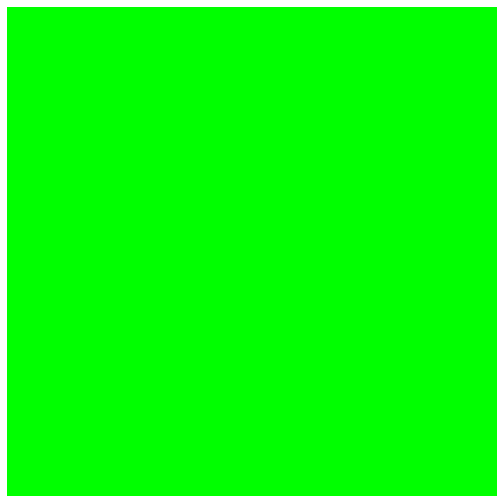

In [8]:
plt.imshow(green)
_ = plt.axis('off')

### Чтение, отображение и запись изображений и видео

#### Чтение

![](./../images/04-read.png)

Читать изображения с диска можно с помощью функции OpenCV `imshow`:
```python
import cv2
cv2.imshow(window_name, image_array)
```
Функция имеет следующие параметры:
- *window_name* - название окна, в котором будет показано изображение
- *image_array* - объект `ndarray`, содержащий изображение в `bgr` формате

In [9]:
image_bgr = cv2.imread('./../images/01-opencv.jpeg')

In [10]:
cv2.imshow('image_bgr', image_bgr)
cv2.waitKey(-1)
cv2.destroyAllWindows()

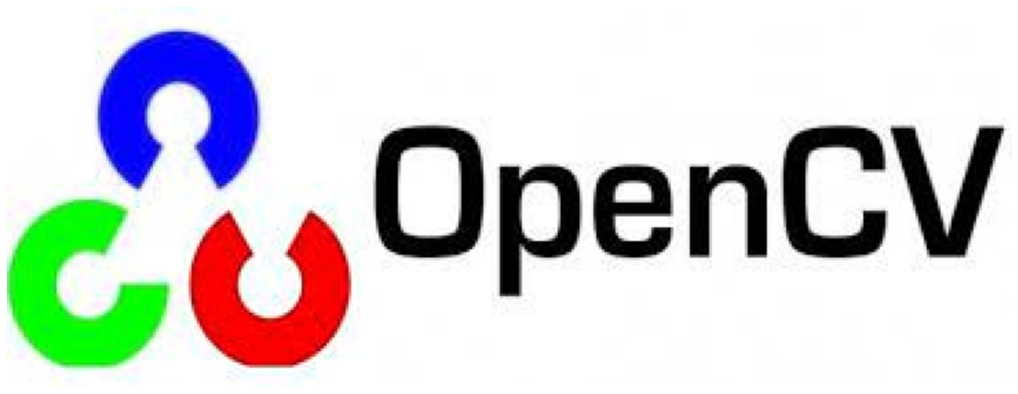

In [11]:
plt.imshow(image_bgr)  # matplotlib по умолчанию ожидает изображение формата rgb
_ = plt.axis('off')

Правильный вывод:

![](./../images/01-opencv.jpeg)

Ниже несколько констант, используемых в функции `cvtColot`:
```python
import cv2
cv2.COLOR_BGR2RGB # convert BGR image to RGB
cv2.COLOR_RGB2BGR # convert RGB image to BGR
cv2.COLOR_BGR2GRAY # convert BGR to gray scale
cv2.COLOR_RGB2GRAY # convert RGB to gray scale
cv2.COLOR_GRAY2BGR # convert Gray scale to BGR
cv2.COLOR_GRAY2RGB # convert Gray scale to RGB
```

In [12]:
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

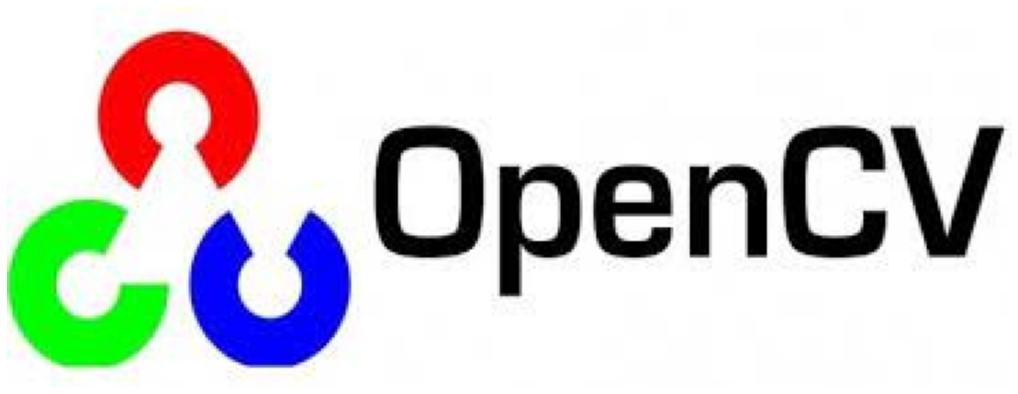

In [13]:
plt.imshow(image_rgb)
_ = plt.axis('off')

![](./../images/07-bgr-incorrect.png)

![](./../images/08-bgr-correct.png)

#### Запись

![](./../images/05-write.png)

Для записи изображения следует использовать функцию `imwrite`:
```python
import cv2
cv2.imwrite(file_name, image_array)
```
Она имеет параметры:
- *file_name* - путь (относительный или абсолютный) и название файла вместе с разрешением (следует использовать формат `jpg`)
- *image_array* - объект `ndarray` содержащий изображение в формате `bgr`

In [14]:
cv2.imwrite('black.jpg', black)

True

In [15]:
!ls

01-opencv.ipynb  black.jpg


![](./black.jpg)

#### Работа с видео

![](./../images/06-video.png)

Порядок действий следующий при использовании `VideoCapture`:
1. Создаём объект `VideoCapture` с указанным источником видео
2. Используем функцию `isOpened` для проверки, что поток открыт и подготовлен для чтения
3. Используем функцию `read` для покадрового чтения видео
4. По завершению чтения используем функцию `release` для закрытия потока

In [16]:
capture = cv2.VideoCapture(0)

success, frame = capture.read()

if not success:
    raise ValueError(f'Can not read first frame from web-cam')

while True:
    success, frame = capture.read()  # bgr

    if not success:
        break

    cv2.imshow('Press Q for exit', frame)

    key = cv2.waitKey(1) & 0xFF

    if key == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()

### Изменение размеров изображения

![](./../images/09-resize.png)

Используется функция `resize`:
```python
import cv2
resizedImage = cv2.resize(image_array, new_size[, interpolation_algorithm])
```
Её аргументы:
- *image_array* - изображение в формате `ndarray`
- *new_size* - новый размер в виде кортежа (new_width, new_height)

In [17]:
image_bgr = cv2.imread('./../images/01-opencv.jpeg')

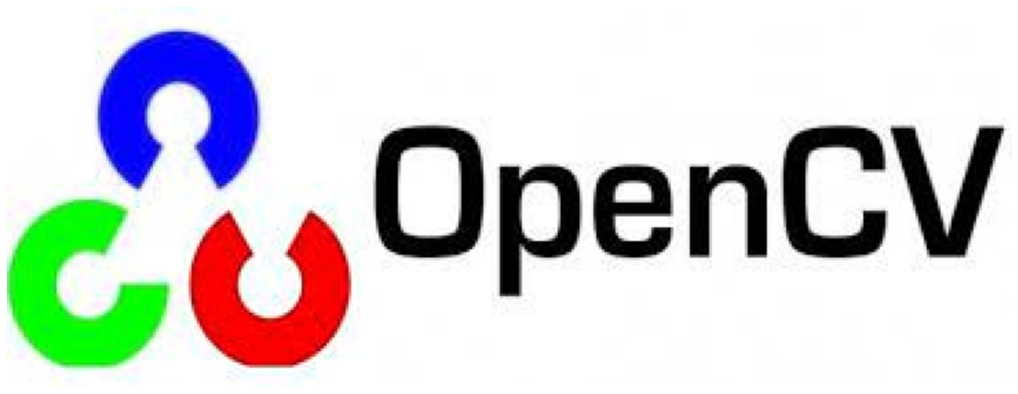

In [18]:
plt.imshow(image_bgr)
_ = plt.axis('off')

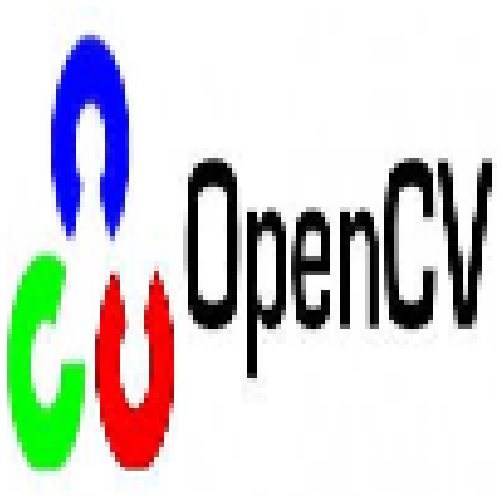

In [19]:
plt.imshow(cv2.resize(image_bgr, (100, 100)))
_ = plt.axis('off')

### Конкатенация изображений

![](./../images/10-concat.png)

Используем функцию `hconcat`:
```python
import cv2
horizConcatenatedImage = cv2.hconcat(list_of_image_arrays)
```
Её аргументы:
- *list_of_image_arrays* - список объектов `ndarray` содержащих изображения для конкатенации

In [20]:
green = np.zeros(shape=(150, 150, 3), dtype=np.uint8)
green[:, :, 1] = 255

red = np.zeros(shape=(150, 150, 3), dtype=np.uint8)
red[:, :, 2] = 255

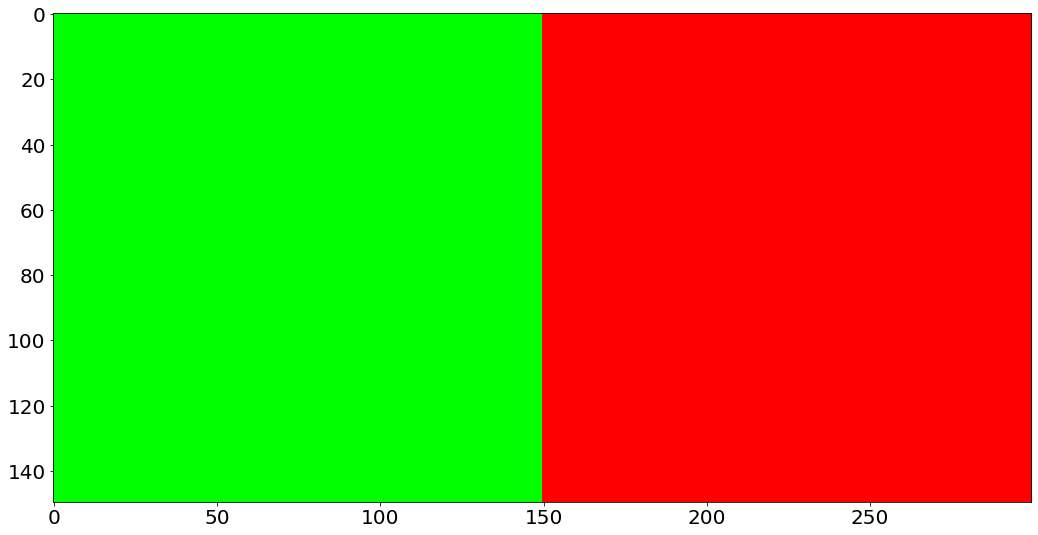

In [21]:
plt.imshow(cv2.cvtColor(cv2.hconcat([green, red]), cv2.COLOR_BGR2RGB))

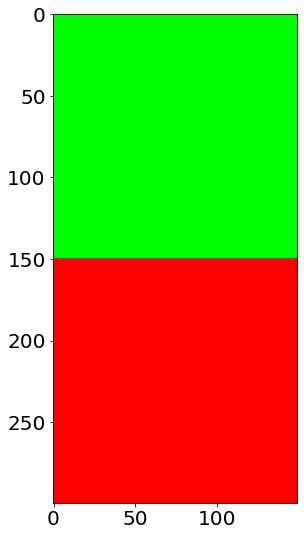

In [22]:
plt.imshow(cv2.cvtColor(cv2.vconcat([green, red]), cv2.COLOR_BGR2RGB))

### Рисование фигур 

Напишем вспомогательную функцию:

In [23]:
def show_with_matplotlib(image_bgr: np.ndarray):

    image_rgb = image_bgr[:, :, ::-1]

    plt.imshow(image_rgb)
    plt.axis('off')

Создадим функцию для генерации случайного цвета:

In [24]:
def random_color():
    return np.random.randint(low=0, high=255, size=3).tolist()

#### Прямые линии

Используем функцию `line`:
```python
import cv2
image_with_line = cv2.line(image, pt1, pt2, color, thickness)
```
Её аргументы:
- *image* - изображение в формате `ndarray`, на котором будем рисовать
- *pt1* - координаты начала линии в формате (x1, y1)
- *pt2* - координаты конца линии в формате (x2, y2)
- *color* - цвет в виде кортежа (B, G, R)
- *thickness* - толщина линии

In [25]:
white = np.full(shape=(400, 400, 3), fill_value=255, dtype=np.uint8)

In [26]:
_ = cv2.line(white, (0, 0), (400, 400), random_color(), 1)
_ = cv2.line(white, (0, 400), (400, 0), random_color(), 5)
_ = cv2.line(white, (200, 0), (200, 400), random_color(), 10)
_ = cv2.line(white, (0, 200), (400, 200), random_color(), 15)

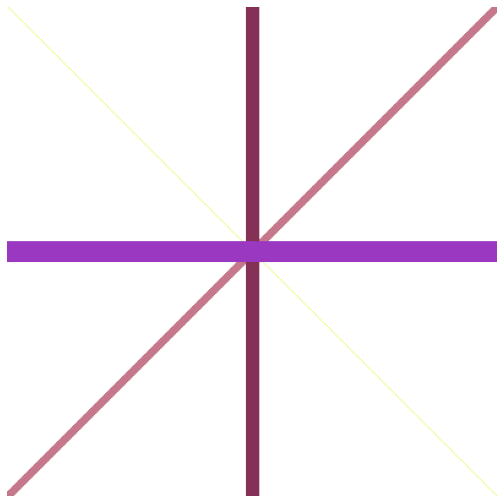

In [27]:
show_with_matplotlib(white)

#### Прямоугольники

Используем функцию `rectangle`:
```python
import cv2
image_with_rect = cv2.rectangle(image, pt1, pt2, color, thickness)
```
Её аргументы:
- *image* - изображение в формате `ndarray`, на котором будем рисовать
- *pt1* - координаты верхнего левого угла в формате (x1, y1)
- *pt2* - координаты нижнего правого угла в формате (x2, y2)
- *color* - цвет в виде кортежа (B, G, R)
- *thickness* - толщина линии, где -1 - это сплошная заливка

In [28]:
white = np.full(shape=(400, 400, 3), fill_value=255, dtype=np.uint8)

In [29]:
_ = cv2.rectangle(white, (10, 50), (60, 300), random_color(), 3)
_ = cv2.rectangle(white, (80, 50), (130, 300), random_color(), -1)
_ = cv2.rectangle(white, (150, 50), (350, 100), random_color(), -1)
_ = cv2.rectangle(white, (150, 150), (350, 300), random_color(), 10)

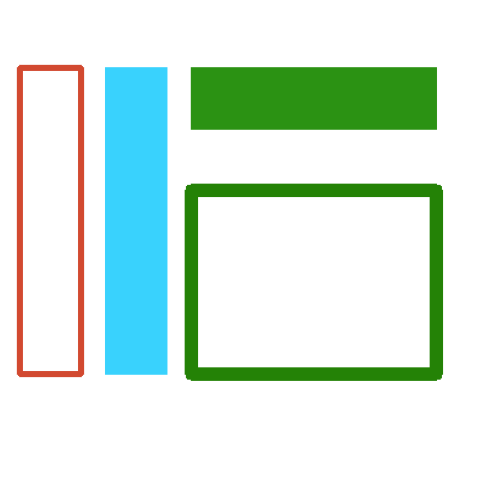

In [30]:
show_with_matplotlib(white)

#### Круги

Используем функцию `circle`:
```python
import cv2
image_with_circle = cv2.circle(image, center, radius, color, thickness)
```
Её аргументы:
- *image* - изображение в формате `ndarray`, на котором будем рисовать
- *center* - координаты центра круга в формате (x, y)
- *radius* - радиус круга
- *color* - цвет в виде кортежа (B, G, R)
- *thickness* - толщина линии, где -1 - это сплошная заливка

In [31]:
white = np.full(shape=(400, 400, 3), fill_value=255, dtype=np.uint8)

In [32]:
_ = cv2.circle(white, (50, 50), 20, random_color(), 3)
_ = cv2.circle(white, (100, 100), 30, random_color(), -1)
_ = cv2.circle(white, (200, 200), 40, random_color(), 10)
_ = cv2.circle(white, (300, 300), 40, random_color(), -1)

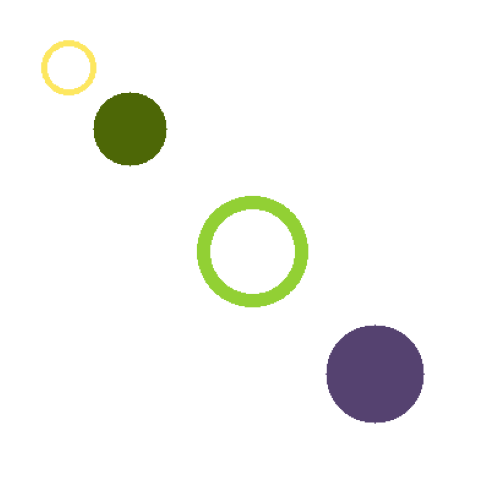

In [33]:
show_with_matplotlib(white)

#### Текст

Используем функцию `putText`:
```python
import cv2
image_with_text = cv2.putText(image, text, pt, font, size, color, thickness)
```
Её аргументы:
- *image* - изображение в формате `ndarray`, на котором будем рисовать
- *text* - сам текст
- *pt* - координаты нижнего левого угла начала текста в формате (x, y)
- *font* - используемый шрифт
- *size* - размер шрифта
- *color* - цвет в виде кортежа (B, G, R)
- *thickness* - толщина линий букв

In [34]:
white = np.full(shape=(120, 512, 3), fill_value=255, dtype=np.uint8)

In [35]:
_ = cv2.putText(white, 'OpenCV', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, random_color(), 2)
_ = cv2.putText(white, 'with', (10, 70), cv2.FONT_HERSHEY_SIMPLEX, 0.9, random_color(), 2)
_ = cv2.putText(white, 'Python', (10, 110), cv2.FONT_HERSHEY_SIMPLEX, 0.9, random_color(), 2)

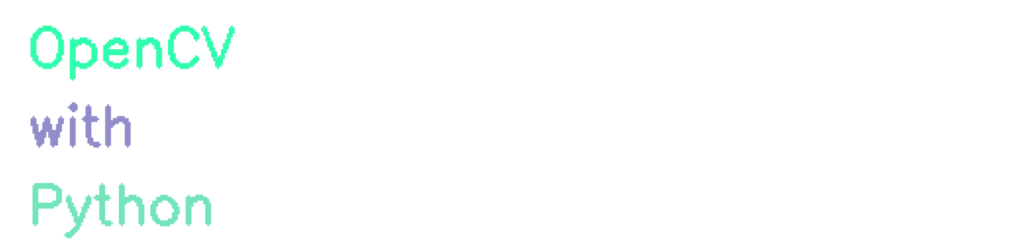

In [36]:
show_with_matplotlib(white)